In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import seaborn as sns
from scipy.stats import multivariate_normal
from itertools import chain
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
file_path = '/content/drive/MyDrive/Research Project/random-word-vectors-main'
file_repos = ['combined_vectors']

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = [file_path+'/'+irepos+'/' for irepos in file_repos]
path

['/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/']

In [ ]:
files = []
for ifiles in path:
  print(ifiles)
  files.append(glob.glob(ifiles+"*.txt"))
  
files = list(chain(*files))
len(files)

/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/


11

In [ ]:
df = pd.read_csv(files[3],header=None,sep=',',usecols=[0,1,2,3,4,5]).iloc[:, 0:5].sort_values([0,1])
df = df.set_axis(['Word', 'Layer', 'Frequency', 'cluster', 'msScore'], axis=1, inplace=False)
df = pd.pivot_table(df, values = 'cluster', index=['Word','Frequency'], columns = 'Layer',aggfunc = 'min').reset_index()
df

Layer,Word,Frequency,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,drop,12,8,2,2,3,3,2,2,4,3,7,2,5,3,2,7,2,2,3,2,2,2,5,2,2,2
1,duration,18,3,5,9,3,7,2,4,3,2,2,2,2,2,2,10,2,4,2,2,6,2,7,2,5,2
2,duty,53,3,4,5,2,3,4,4,3,4,2,2,4,4,2,2,2,4,2,5,3,2,3,2,2,2
3,early,99,4,4,5,5,2,4,6,2,2,4,2,2,5,2,6,5,2,2,8,5,2,4,2,2,3
4,earth,24,10,6,6,7,2,7,10,3,10,9,8,2,3,9,9,2,7,10,2,10,2,2,10,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,fire,34,6,3,2,2,2,2,3,3,3,3,2,3,3,2,3,2,2,3,2,2,2,2,2,3,3
93,firm,31,5,2,10,8,9,5,5,10,6,3,5,3,2,2,2,2,7,2,5,2,6,2,2,5,2
94,first,346,3,3,4,4,8,6,3,4,4,4,4,4,3,4,6,3,3,5,5,2,5,2,2,3,3
95,fish,12,6,3,9,4,2,2,3,9,5,3,2,9,9,9,7,2,9,3,9,9,2,3,2,6,2


In [ ]:
for index,file in enumerate(files):
  print(file)
  df = pd.read_csv(file,header=None,sep=',',usecols=[0,1,2,3,4,5]).iloc[:, 0:5].sort_values([0,1])
  df = df.set_axis(['Word', 'Layer', 'Frequency', 'cluster', 'msScore'], axis=1, inplace=False)
  df = pd.pivot_table(df, values = 'cluster', index=['Word' ], columns = 'Layer',aggfunc = 'min').reset_index()
  if index ==0:
    words_cluster = df
  else:
    words_cluster = pd.concat([words_cluster, df])

/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_44_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_100_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_201_300_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_301_400_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_401_500_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_501_600_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_601_700_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_701_800_25.txt
/content/drive/MyDrive/Research Project/random-word-vectors-main/combined_vectors/MOG_Clusters_801_900_25.txt
/content/drive/MyDr

In [ ]:
words_cluster.info
#words_cluster.to_csv('Words_Freq.csv')

<bound method DataFrame.info of Layer         Word     0    1    2    3    4  ...   19   20   21   22   23   24
0         ability   10.0  5.0  4.0  4.0  7.0  ...  2.0  6.0  6.0  3.0  4.0  5.0
1            able    2.0  2.0  4.0  2.0  4.0  ...  2.0  2.0  2.0  2.0  2.0  2.0
2           about    5.0  5.0  5.0  3.0  4.0  ...  3.0  3.0  6.0  4.0  3.0  5.0
3           above    9.0  3.0  5.0  4.0  2.0  ...  4.0  5.0  3.0  3.0  3.0  4.0
4          accept    2.0  2.0  4.0  5.0  5.0  ...  2.0  8.0  2.0  2.0  2.0  3.0
..             ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
92       concrete    2.0  2.0  5.0  3.0  2.0  ...  2.0  2.0  2.0  2.0  4.0  5.0
93      condition    9.0  2.0  4.0  2.0  5.0  ...  5.0  5.0  7.0  3.0  7.0  6.0
94        conduct    2.0  2.0  4.0  5.0  5.0  ...  2.0  3.0  2.0  5.0  6.0  2.0
95     conference    4.0  5.0  2.0  7.0  4.0  ...  5.0  5.0  3.0  9.0  2.0  3.0
96     confidence   10.0  7.0  2.0  3.0  3.0  ...  2.0  3.0  2.0  4.0  2.0  2.0

[1069 r

In [ ]:
words_concreteness = pd.read_excel(file_path+'/Concreteness_ratings_Brysbaert_et_al_BRM.xlsx')

In [ ]:
words_concreteness['Word'] =words_concreteness['Word'].str.strip()
words_cluster['Word'] =words_cluster['Word'].str.strip()

In [ ]:
df = words_cluster.merge(words_concreteness,how='inner', on='Word')

In [ ]:
df['mean_Clusters'] = df[range(0,25)].mean(axis=1)

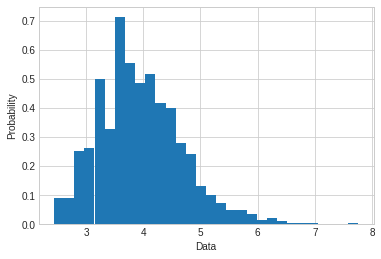

In [ ]:
plt.hist(df['mean_Clusters'], density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

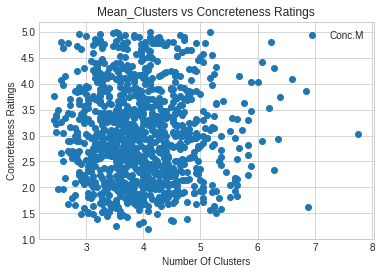

In [ ]:
df.plot(x='mean_Clusters', y='Conc.M', style='o')
plt.title('Mean_Clusters vs Concreteness Ratings')
plt.xlabel('Number Of Clusters')
plt.ylabel('Concreteness Ratings')
plt.show()

In [ ]:
df=df.dropna()

In [ ]:
result = pd.DataFrame({'Layer': [0.0],
        'MAE':[0.0],
        'MSE': [0.0],
        'RMSE': [0.0],
        'Testing_MAError': [0.0],
        'Testing_MSError': [0.0],
        'Testing_RMSError': [0.0]
        })

In [ ]:
for layer in range(0,25):
  try:
    x = df[[layer]].values.flatten().reshape(-1,1)
    y = df['Conc.M'].values.flatten()
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    result = result.append(pd.DataFrame({'Layer':[layer],
                            'MAE':[metrics.mean_absolute_error(y_train, y_pred_train)],
                            'MSE':[metrics.mean_squared_error(y_train, y_pred_train)],
                            'RMSE':[np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))],
                            'Testing_MAError':[metrics.mean_absolute_error(y_test, y_pred)],
                            'Testing_MSError':[metrics.mean_squared_error(y_test, y_pred)],
                            'Testing_RMSError':[np.sqrt(metrics.mean_squared_error(y_test, y_pred))]

    }))
    print('Layer:{}'.format(layer))
    print('-----------------------------------------------------------------------')
    print('Training Errors:')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
    print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('-----------------------------------------------------------------------')
    print('Test Errors:')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-')
  except:
    continue


result = result[1:].reset_index()
result = result.drop('index',axis=1)

Layer:0
-----------------------------------------------------------------------
Training Errors:
Mean Absolute Error: 0.7415304155259261
Mean Squared Error: 0.8020344564997898
Root Mean Squared Error: 0.895563764619689
-----------------------------------------------------------------------
Test Errors:
Mean Absolute Error: 0.7564996045121896
Mean Squared Error: 0.8132843856297826
Root Mean Squared Error: 0.9018228127685519
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Layer:1
-----------------------------------------------------------------------
Training Errors:
Mean Absolute Error: 0.7594029429248913
Mean Squared Error: 0.8303375907614935
Root Mean Squared Error: 0.9112286160791339
-----------------------------------------------------------------------
Test Errors:
Mean Absolute Error: 0.6906683324997503
Mean Squared Error: 0.6970700218624349
Root Mean Squared Error: 0.8349071935625151
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Layer

In [ ]:
df.to_csv('Words_Layers_Conc.csv')
result.to_csv('Regression_Results.csv')

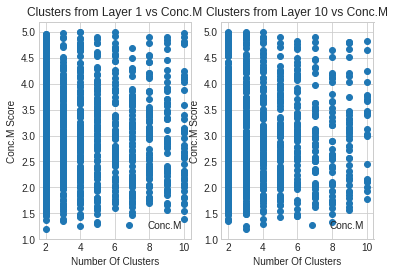

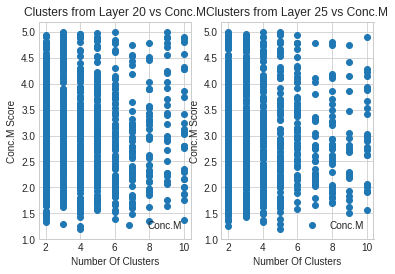

In [ ]:
#plt.subplot(1, 2, 1)

plt.figure(1)
plt.subplot(1,2,1)
df.plot(x=0, y='Conc.M', style='o',ax=plt.gca())
plt.title('Clusters from Layer 1 vs Conc.M')
plt.xlabel('Number Of Clusters')
plt.ylabel('Conc.M Score')

plt.subplot(1,2,2)
df.plot(x=9, y='Conc.M', style='o',ax=plt.gca())
plt.title('Clusters from Layer 10 vs Conc.M')
plt.xlabel('Number Of Clusters')
plt.ylabel('Conc.M Score')
plt.show()

plt.subplot(1,2,1)


df.plot(x=19, y='Conc.M', style='o',ax=plt.gca())
plt.title('Clusters from Layer 20 vs Conc.M')
plt.xlabel('Number Of Clusters')
plt.ylabel('Conc.M Score')
#plt.show()

plt.subplot(1,2,2)

df.plot(x=24, y='Conc.M', style='o',ax=plt.gca())
plt.title('Clusters from Layer 25 vs Conc.M')
plt.xlabel('Number Of Clusters')
plt.ylabel('Conc.M Score')
plt.show()

In [ ]:
  result.head()

,Layer,MAE,MSE,RMSE,Testing_MAError,Testing_MSError,Testing_RMSError
0,0.0,0.741530,0.802034,0.895564,0.756500,0.813284,0.901823
1,1.0,0.759403,0.830338,0.911229,0.690668,0.697070,0.834907
2,2.0,0.744548,0.796586,0.892516,0.748131,0.829954,0.911018
3,3.0,0.751504,0.816884,0.903816,0.713783,0.752949,0.867726
4,4.0,0.753874,0.825907,0.908794,0.712319,0.718600,0.847703


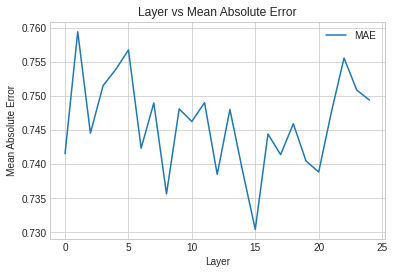

In [ ]:
result.plot(x='Layer', y='MAE')
plt.title('Layer vs Mean Absolute Error')
plt.xlabel('Layer')
plt.ylabel('Mean Absolute Error')
plt.show()

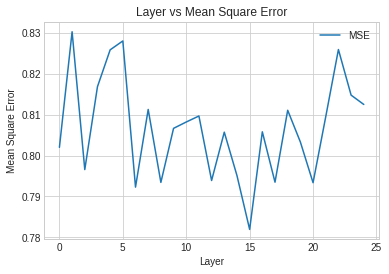

In [ ]:
result.plot(x='Layer', y='MSE')
plt.title('Layer vs Mean Square Error')
plt.xlabel('Layer')
plt.ylabel('Mean Square Error')
plt.show()

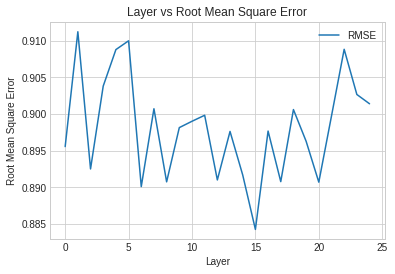

In [ ]:
result.plot(x='Layer', y='RMSE')
plt.title('Layer vs Root Mean Square Error')
plt.xlabel('Layer')
plt.ylabel('Root Mean Square Error')
plt.show()

In [ ]:
result

,Layer,Training_MAError,Training_MSError,Training_RMSError,Testing_MAError,Testing_MSError,Testing_RMSError
0,0.0,0.736449,0.791294,0.889547,0.779161,0.856403,0.925420
1,1.0,0.746872,0.809607,0.899782,0.741658,0.782045,0.884333
2,2.0,0.747917,0.808400,0.899110,0.735854,0.780640,0.883538
3,3.0,0.740294,0.797688,0.893134,0.756926,0.828628,0.910290
4,4.0,0.745888,0.802249,0.895684,0.745236,0.812602,0.901444
5,5.0,0.748694,0.810840,0.900466,0.730357,0.777563,0.881795
6,6.0,0.744913,0.806457,0.898030,0.747475,0.795137,0.891704
7,7.0,0.746635,0.797615,0.893093,0.740236,0.833127,0.912758
8,8.0,0.742805,0.800233,0.894557,0.749110,0.821795,0.906529
9,9.0,0.754141,0.811564,0.900869,0.708684,0.773756,0.879634
